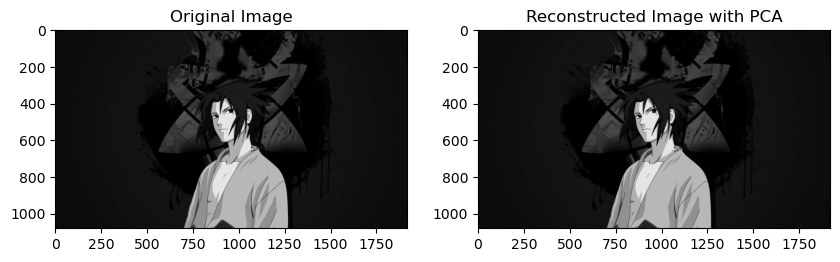

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

# Step 1: Load and preprocess the image (grayscale for simplicity)
img = Image.open('./img/sasuke.jpg').convert('L')  # Convert to grayscale
img_matrix = np.array(img)

# Step 2: Flatten the image but keep its 2D structure ([height, width])
height, width = img_matrix.shape
img_flatten = img_matrix.reshape(height, width)

# Step 3: Apply PCA
pca = PCA(n_components=min(height, width))  # Use min(height, width) or a smaller number
img_pca = pca.fit_transform(img_flatten)

# Step 4: Reconstruct the image using inverse transform
img_reconstructed = pca.inverse_transform(img_pca)

# Step 5: Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_matrix, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image with PCA")
plt.imshow(img_reconstructed, cmap='gray')

plt.show()


In [5]:
# Step 1: Load and preprocess the image (grayscale)
img = Image.open('C:\Users\Student\Desktop\ML_LAB\img').convert('L')  # Convert to grayscale
img_matrix = np.array(img)

# Step 2: Flatten the image but retain its 2D structure (rows = height, columns = width)
height, width = img_matrix.shape
img_flatten = img_matrix.reshape(height, width)

# Step 3: Center the data (subtract the mean)
mean = np.mean(img_flatten, axis=0)
img_centered = img_flatten - mean

# Step 4: Compute the covariance matrix
cov_matrix = np.cov(img_centered, rowvar=False)

# Step 5: Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 6: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 7: Choose the top k eigenvectors (principal components)
k = 50  # You can experiment with different values of k (components to keep)
top_eigenvectors = sorted_eigenvectors[:, :k]

# Step 8: Project the centered data onto the top k eigenvectors (reduce dimensions)
img_pca = np.dot(img_centered, top_eigenvectors)

# Step 9: Reconstruct the image using the top k eigenvectors
img_reconstructed2 = np.dot(img_pca, top_eigenvectors.T) + mean
img_reconstructed2 = img_reconstructed.reshape(height, width)

# Step 10: Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_matrix, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f"Reconstructed Image with PCA (k={k})")
plt.imshow(img_reconstructed2, cmap='gray')

plt.show()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (171738715.py, line 2)

In [27]:
# Calculate Mean Squared Error
mse1 = np.mean((img - img_reconstructed) ** 2)
mse2 = np.mean((img - img_reconstructed2) ** 2)
print(f'Mean Squared Error of first image: {mse1:.2f}')
print(f'Mean Squared Error of second image: {mse2:.2f}')


Mean Squared Error of first image: 333.87
Mean Squared Error of second image: 333.87
